#### Amazinum. Moisei. Task 6:
- SVM hometask with email;
- Sklearn SVM for Iris dataset.

#### Load our email text

In [139]:
import os
import re
import string
import numpy as np
from nltk.stem import PorterStemmer

def get_sample(fn):
    with open(fn, 'r') as f:
        content = f.read()
    return content
    
fn=  os.path.join('emailSample1.txt')
content = get_sample(fn)

content

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

#### Word tokenization

In [140]:
def word_tokenize(content):
    '''
    content: str - body of mail 
    return: list of tokens (str) e.g. ['>', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a']
    '''
    # YOUR_CODE.  Split the content to tokens. You may need re.split()
    # START_CODE 
    tokens= np.array(re.split(r"\s+", content))
    # END_CODE 
    
    return tokens

#### Check results

In [141]:
tokens  = word_tokenize('''> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n''')
tokens

array(['>', 'Anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '?', '>', 'Well,', 'it', 'depends', 'on',
       'how', 'many', 'visitors', "you're", 'expecting.', 'This', 'can',
       'be', 'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', '$100.', 'You', 'should',
       'checkout', 'http://www.rackspace.com/', 'or', 'perhaps', 'Amazon',
       'EC2', 'if', 'youre', 'running', 'something', 'big..', 'To',
       'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list,',
       'send', 'an', 'email', 'to:', 'groupname-unsubscribe@egroups.com',
       ''], dtype='<U33')

#### Lower case

In [142]:
import numpy as np

def lower_case(tokens):
    '''
    tokens: ndarry of str
    return: ndarry of tokens in lower case (str)
    '''
    # YOUR_CODE.  Make all tokens in lower case
    # START_CODE
    tokens = np.array([word.lower() for word in tokens])
    # END_CODE 
   
    return tokens

#### Check results

In [143]:
tokens = lower_case(tokens)
tokens

array(['>', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host',
       'a', 'web', 'portal', '?', '>', 'well,', 'it', 'depends', 'on',
       'how', 'many', 'visitors', "you're", 'expecting.', 'this', 'can',
       'be', 'anywhere', 'from', 'less', 'than', '10', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', '$100.', 'you', 'should',
       'checkout', 'http://www.rackspace.com/', 'or', 'perhaps', 'amazon',
       'ec2', 'if', 'youre', 'running', 'something', 'big..', 'to',
       'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list,',
       'send', 'an', 'email', 'to:', 'groupname-unsubscribe@egroups.com',
       ''], dtype='<U33')

#### Normalize

In [144]:
def normalize_tokens(tokens):
    '''
    tokens: ndarry of str
    return: ndarry of tokens replaced with corresponding unified words
    '''
    # YOUR_CODE.  
        # Remove html and other tags
        # mark all numbers "number"
        # mark all  urls as "httpaddr"
        # mark all emails as "emailaddr"
        # replace $ as "dollar"
        # get rid of any punctuation
        # Remove any non alphanumeric characters
    #  You may  need re.sub()
    # START_CODE 
    tokens = re.sub('<[^<>]+>',' ', str(tokens))

    tokens = re.sub('[0-9]+', 'number', str(tokens))
                   
    tokens = re.sub('(http|https)://[^\s]*', 'httpaddr', str(tokens))
    
    tokens = re.sub('[^\s]+@[^\s]+', 'emailaddr', str(tokens))
    
    tokens = re.sub('[$]+', 'dollar', str(tokens))
       
    for punctuation in string.punctuation:
        tokens = tokens.replace(punctuation, ' ')
    
    # END_CODE 

    return tokens

#### Check results

In [145]:
tokens = normalize_tokens(tokens)
tokens

'      anyone   knows   how   much   it   costs   to   host   a   web \n  portal           well    it   depends   on   how   many   visitors \n  you re   expecting    this   can   be   anywhere   from   less   than \n  number   bucks   a   month   to   a   couple   of   dollarnumber    you   should \n  checkout   httpaddr  or   perhaps   amazon   ecnumber   if \n  youre   running   something   big     to   unsubscribe   yourself \n  from   this   mailing   list    send   an   email   to  \n emailaddr    '

#### Remove zero length tokens

In [146]:
def filter_short_tokens (tokens):
    '''
    tokens: ndarry of str
    return: ndarry of filtered tokens (str)
    '''
    original_tokens_len = len(tokens)
    
    # YOUR_CODE. Keep only tokens that lenght >0  
    # START_CODE 
    tokens= np.array(re.compile(r'\b[^\W\d_]{1,}\b').findall(str(tokens)))
    # END_CODE     
   
    print ('Original len= {}\nRemaining len= {}'.format(original_tokens_len, len(tokens)))    
    
    return tokens

#### Check results

In [147]:
tokens = filter_short_tokens(tokens)
tokens

Original len= 501
Remaining len= 62


array(['anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depends', 'on', 'how', 'many',
       'visitors', 'you', 're', 'expecting', 'this', 'can', 'be',
       'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a',
       'month', 'to', 'a', 'couple', 'of', 'dollarnumber', 'you',
       'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon',
       'ecnumber', 'if', 'youre', 'running', 'something', 'big', 'to',
       'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list',
       'send', 'an', 'email', 'to', 'emailaddr'], dtype='<U12')

#### Stem tokens

In [148]:
def stem_tokens(tokens):
    '''
    tokens: ndarry of str
    return: ndarry of stemmed tokens e.g. array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani']...
    '''
    # YOUR_CODE. replace the tokens by stemmed form. You may need PorterStemmer.stem() 
    # START_CODE
    ps = PorterStemmer()
    tokens = np.array([ps.stem(word) for word in tokens])
    # END_CODE     
   
    return tokens

#### Check results

In [149]:
tokens = stem_tokens(tokens)
tokens

array(['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a',
       'web', 'portal', 'well', 'it', 'depend', 'on', 'how', 'mani',
       'visitor', 'you', 're', 'expect', 'thi', 'can', 'be', 'anywher',
       'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a',
       'coupl', 'of', 'dollarnumb', 'you', 'should', 'checkout',
       'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your',
       'run', 'someth', 'big', 'to', 'unsubscrib', 'yourself', 'from',
       'thi', 'mail', 'list', 'send', 'an', 'email', 'to', 'emailaddr'],
      dtype='<U10')

#### Vocabulary

In [150]:
import pandas as pd

def get_vocabulary(fn):
    '''
    fn: str - full path to file 
    return: ndarray of str e.g. array(['aa', 'ab', 'abil', ..., 'zdnet', 'zero', 'zip'], dtype=object)
    '''
    vocab_list = pd.read_table(fn, header=None)
    vocab = np.array(vocab_list)[:,1] # first columns is index, select only words column  
    print ('len(vocab)= {:,}'.format(len(vocab)))
    return vocab

fn=  os.path.join('vocab.txt')
vocab = get_vocabulary(fn)
vocab

len(vocab)= 1,899


array(['aa', 'ab', 'abil', ..., 'zdnet', 'zero', 'zip'], dtype=object)

#### Feature representation

In [151]:
from itertools import chain
def represent_features(tokens,vocab):
    '''
    tokens: ndarry of str
    tokens: ndarry of str
    return: ndarry of binary values 1 if word from vocabulary is in mail 0 otherwise
    '''
    # YOUR_CODE. Compute the array with 1/0 corresponding to is word from vocabulary in mail 
    # START_CODE 
    tokens = str(tokens)
    vocabulary = str(vocab)
    tokens_represented = np.array([1 if tokens in vocabulary else 0 for tokens in vocabulary])
    # END_CODE     

    print ('{} word(s) from vocab are in the tokens.'.format(np.sum(tokens_represented)))

   
    return tokens_represented

#### Check results

In [152]:
tokens_represented = represent_features(tokens, vocab)
tokens_represented

43 word(s) from vocab are in the tokens.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Composing all steps of preprocessing

In [153]:
def preprocess (content,vocab):
    '''
    content: str - body of mail 
    vocab: ndarray of str - list of considered words 
    '''
    # YOUR_CODE. Compute the array with 1/0 corresponding to is word from vocabulary in mail 
    # START_CODE 

    # tokenize content    
    tokens  = np.array(re.split(r"\s+", content))
    
    # make lower case
    tokens = np.array([word.lower() for word in tokens])

    # normalize tokens
    tokens = tokens = re.sub('<[^<>]+>',' ', str(tokens))

    tokens = re.sub('[0-9]+', 'number', str(tokens))
                   
    tokens = re.sub('(http|https)://[^\s]*', 'httpaddr', str(tokens))
    
    tokens = re.sub('[^\s]+@[^\s]+', 'emailaddr', str(tokens))
    
    tokens = re.sub('[$]+', 'dollar', str(tokens))
       
    for punctuation in string.punctuation:
        tokens = tokens.replace(punctuation, ' ')

    # remove zero words
    tokens = np.array(re.compile(r'\b[^\W\d_]{1,}\b').findall(str(tokens)))
    
    # stem words
    original_tokens_len = len(tokens)
    
    ps = PorterStemmer()
    
    tokens = np.array([ps.stem(word) for word in tokens])
    
    print ('Original len= {}\nRemaining len= {}'.format(original_tokens_len, len(tokens)))
    
    # convert to binary array of features
    tokens = str(tokens)
    vocabulary = str(vocab)
    
    tokens_represented = np.array([1 if tokens in vocabulary else 0 for tokens in vocabulary])
    
    print ('{} word(s) from vocab are in the tokens.'.format(np.sum(tokens_represented)))
    # END_CODE     
    
    return tokens_represented

#### Check results

In [154]:
preprocess(content,vocab)

Original len= 62
Remaining len= 62
43 word(s) from vocab are in the tokens.


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Training and test sets

In [155]:
from scipy.io import loadmat

fn=  os.path.join('spamTrain.mat')

mat= loadmat(fn)
X_train= mat['X']
y_train= mat['y'].ravel()

print ('X_train.shape= {}',X_train.shape)
print ('y_train.shape= {}',y_train.shape)

fn=  os.path.join('spamTest.mat')
mat= loadmat(fn)
X_test = mat['Xtest']
y_test = mat['ytest'].ravel() 

print ('X_test.shape= {}',X_test.shape)
print ('y_test.shape= {}',y_test.shape)
index = 0 
print ('Sample with index  ={}: \n{}'.format(index, X_train[index]))

X_train.shape= {} (4000, 1899)
y_train.shape= {} (4000,)
X_test.shape= {} (1000, 1899)
y_test.shape= {} (1000,)
Sample with index  =0: 
[0 0 0 ... 0 0 0]


#### Training the model

In [156]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC

C = .1
clf= LinearSVC(C=C)
clf.fit(X_train,y_train)
print ('Score train= {}'.format(clf.score(X_train,y_train)))
print ('Score test= {}'.format(clf.score(X_test,y_test)))

Score train= 0.99975
Score test= 0.992


#### Determining most spam contributors

In [157]:
print('clf.intercept_={}'.format(clf.intercept_))
print ('clf.coef_={}'.format(clf.coef_))

# YOUR_CODE. Compute top 20 largest coeficients and return the corresponding 20 words from vocabulary
# START_CODE
df_vocab = pd.read_csv('vocab.txt', sep='\t', header=None)
df_vocab.columns = ['index', 'word']
df_vocab = df_vocab.drop(['index'], axis=1).reset_index(drop=True)
df_vocab['weights'] = clf.coef_[0,:]

top_spam_contributors = np.array(df_vocab.sort_values(by='weights', ascending=False).head(20))
# END_CODE  

clf.intercept_=[0.1958353]
clf.coef_=[[-0.00420465  0.02054861  0.04372872 ... -0.08422264 -0.00846158
   0.05294408]]


#### Check result

In [158]:
print (top_spam_contributors)

[['our' 0.42166499558247716]
 ['remov' 0.3871731388512784]
 ['click' 0.38705984130119514]
 ['basenumb' 0.3466173138582637]
 ['guarante' 0.3416855492998358]
 ['visit' 0.3030278948326087]
 ['bodi' 0.2635236503953449]
 ['will' 0.24439391718628448]
 ['numberb' 0.2387949622737645]
 ['price' 0.23419912406923382]
 ['dollar' 0.23231486460089443]
 ['nbsp' 0.2270807275942906]
 ['below' 0.2231989759666599]
 ['lo' 0.21999370032178145]
 ['most' 0.2145483795316197]
 ['send' 0.20345501341409955]
 ['dollarnumb' 0.20254074100663033]
 ['credit' 0.20122161159054716]
 ['wi' 0.20109862745951967]
 ['hour' 0.2009123839650638]]


#### Use model for prediction

In [159]:
print(os.getcwd())

C:\Users\Evolu\Amazinum. Task 6. SVM


#### Для того, аби перевірити на спам Emails, нам необхідно мати три основні характеристики:
- Самі Emails;
- Наш preprocess;
- І характеристика, на яку опиратимуться чи це спам чи ні (top_spam_contributors)

#### Не зміг поки відтворити це.

In [160]:
for sfn in ['emailSample1.txt', 'emailSample2.txt', 'spamSample1.txt', 'spamSample2.txt']:
    fn=  os.path.join(sfn)
    content = get_sample(fn)    
    x = tokens_represented(top_spam_contributors)
    # YOUR_CODE.  Preprocess the sample and get prediction 0 or 1 (1 is spam)
    # START_CODE 
    prediction = clf.predict(x.reshape(1, -1))
    # END_CODE    
    
    print ('{} is {}\n'.format(sfn, ('Not Spam','Spam')[prediction]))

print ('Latter sample:\n{1}\n{0}\n{1}'.format(content, '='*50))

TypeError: 'numpy.ndarray' object is not callable

#### Load iris dataset

In [23]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### SVM linear kernel for iris

In [24]:
from sklearn.svm import SVC
clf = LinearSVC(C=1, max_iter= 10000).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))

train accuracy= 97.500%


#### Sklearn SVC RBF Kernel

In [26]:
gamma=1
clf = SVC(C=1, gamma=gamma).fit(X_train,y_train) # rbf is default 
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))

train accuracy= 97.500%


#### Sklearn SVC Polynomial Kernel

In [27]:
degree= 3
clf = SVC(kernel= 'poly').fit(X_train,y_train) # default=3)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))

train accuracy= 98.333%


#### Trying to visualize different SVM trainings

C:\Users\Evolu\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


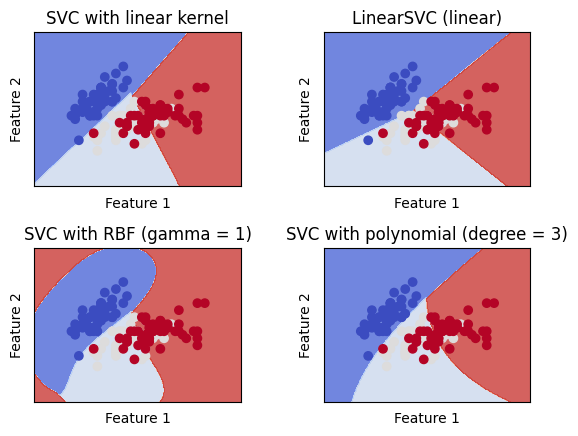

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import data
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=1, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear)',
          'SVC with RBF (gamma = 1)',
          'SVC with polynomial (degree = 3)']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()